**MNIST DATASET**

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


*Exercício 2*

**1 – Train a DNN**

In [10]:
pip install tensorflow


In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Carregando o conjunto de dados MNIST
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalizando os pixels para o intervalo [0, 1]
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

# Convertendo os rótulos para one-hot encoding
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Construindo a arquitetura do modelo
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Compilando o modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Treinando o modelo
model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)

# Avaliando o modelo no conjunto de teste
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Accuracy: {test_acc:.4f}')


Epoch 1/5
750/750 [==============================] - 48s 62ms/step - loss: 0.2136 - accuracy: 0.9346 - val_loss: 0.0651 - val_accuracy: 0.9818
Epoch 2/5
750/750 [==============================] - 45s 60ms/step - loss: 0.0584 - accuracy: 0.9822 - val_loss: 0.0482 - val_accuracy: 0.9859
Epoch 3/5
750/750 [==============================] - 44s 58ms/step - loss: 0.0405 - accuracy: 0.9874 - val_loss: 0.0454 - val_accuracy: 0.9856
Epoch 4/5
750/750 [==============================] - 43s 57ms/step - loss: 0.0322 - accuracy: 0.9903 - val_loss: 0.0372 - val_accuracy: 0.9893
Epoch 5/5
313/313 [==============================] - 3s 9ms/step - loss: 0.0326 - accuracy: 0.9899
Acurácia no conjunto de teste: 0.9898999929428101


**2 – utilize callbacks**

•	Tensorboard: é configurado para salvar logs no diretório "./logs".

•	EarlyStopping: é configurado para parar o treino se a perda de validação não melhorar por 3 épocas.

•	ModelCheckpoint: é configurado para salvar o melhor modelo com base na perda de validação.


In [11]:
pip install tensorboard

In [12]:
#Callbacks são úteis para monitorar e interagir com o processo de treinamento durante cada época

from tensorflow.keras.callbacks import TensorBoard, EarlyStopping, ModelCheckpoint

# Carregando o conjunto de dados MNIST
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalizando os pixels para o intervalo [0, 1]
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

# Convertendo os rótulos para one-hot encoding
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Construindo a arquitetura do modelo
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Compilando o modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks
tensorboard_callback = TensorBoard(log_dir='./logs', histogram_freq=1)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3)
model_checkpoint_callback = ModelCheckpoint(filepath='best_model.h5', save_best_only=True)

# Treinando o modelo com callbacks
model.fit(train_images, train_labels,
          epochs=50,
          batch_size=64,
          validation_split=0.2,
          callbacks=[tensorboard_callback, early_stopping_callback, model_checkpoint_callback])

# Avaliando o modelo no conjunto de teste
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Accuracy: {test_acc:.4f}')


Epoch 1/50
750/750 [==============================] - 45s 59ms/step - loss: 0.2191 - accuracy: 0.9325 - val_loss: 0.0708 - val_accuracy: 0.9799
Epoch 2/50
  3/750 [..............................] - ETA: 32s - loss: 0.0409 - accuracy: 0.9844

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


750/750 [==============================] - 43s 57ms/step - loss: 0.0590 - accuracy: 0.9812 - val_loss: 0.0649 - val_accuracy: 0.9812
Epoch 3/50
750/750 [==============================] - 43s 57ms/step - loss: 0.0400 - accuracy: 0.9868 - val_loss: 0.0480 - val_accuracy: 0.9862
Epoch 4/50
750/750 [==============================] - 43s 57ms/step - loss: 0.0309 - accuracy: 0.9904 - val_loss: 0.0421 - val_accuracy: 0.9898
Epoch 5/50
750/750 [==============================] - 42s 56ms/step - loss: 0.0257 - accuracy: 0.9919 - val_loss: 0.0450 - val_accuracy: 0.9872
Epoch 6/50
750/750 [==============================] - 42s 56ms/step - loss: 0.0208 - accuracy: 0.9932 - val_loss: 0.0410 - val_accuracy: 0.9897
Epoch 7/50
750/750 [==============================] - 42s 56ms/step - loss: 0.0166 - accuracy: 0.9947 - val_loss: 0.0373 - val_accuracy: 0.9890
Epoch 8/50
750/750 [==============================] - 42s 56ms/step - loss: 0.0149 - accuracy: 0.9953 - val_loss: 0.0372 - val_accuracy: 0.9904
Epo

**3 - Model Evaluation**

313/313 [==============================] - 3s 9ms/step - loss: 0.0433 - accuracy: 0.9898
Acurácia no conjunto de teste: 0.989799976348877
313/313 [==============================] - 3s 10ms/step

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      1.00      1.00      1135
           2       1.00      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       1.00      0.99      0.99       892
           6       1.00      0.98      0.99       958
           7       0.98      1.00      0.99      1028
           8       0.99      0.98      0.99       974
           9       0.98      0.99      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



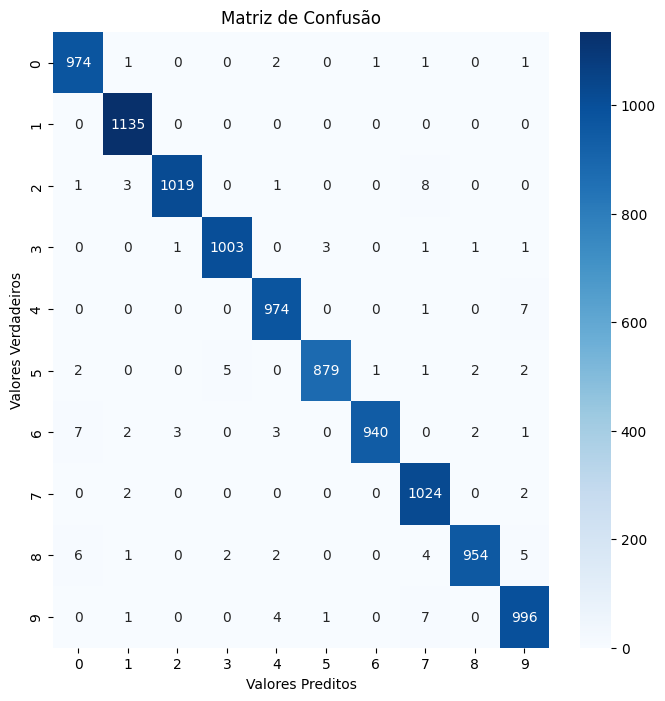

In [13]:
# Importando bibliotecas necessárias
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Função para plotar matriz de confusão
def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 8))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
    plt.title("Matriz de Confusão")
    plt.xlabel("Valores Preditos")
    plt.ylabel("Valores Verdadeiros")
    plt.show()

# Função para avaliar o modelo
def evaluate_model(model, test_images, test_labels, class_names):
    # Avaliando o modelo no conjunto de teste
    test_loss, test_acc = model.evaluate(test_images, test_labels)
    print(f'Accuracy: {test_acc:.4f}')

    # Fazendo previsões no conjunto de teste
    predictions = model.predict(test_images)
    predicted_classes = np.argmax(predictions, axis=1)
    true_classes = np.argmax(test_labels, axis=1)

    # Relatório de classificação
    print("\nRelatório de Classificação:")
    print(classification_report(true_classes, predicted_classes, target_names=class_names))

    # Matriz de Confusão
    plot_confusion_matrix(true_classes, predicted_classes, class_names)

# Class names para o conjunto de dados MNIST
class_names = [str(i) for i in range(10)]

# Chame a função de avaliação
evaluate_model(model, test_images, test_labels, class_names)


**4 – create a Lenet CNN in keras framework**


LeNet-5 é uma arquitetura de rede neural convolucional clássica desenvolvida por Yann LeCun e seus colaboradores para reconhecimento de dígitos manuscritos.

In [14]:
from tensorflow.keras import layers, models

# Definindo a arquitetura da rede LeNet-5
def create_lenet_model(input_shape=(32, 32, 1), num_classes=10):
    model = models.Sequential()

    # Camada 1: Convolucional + ReLU + Pooling
    model.add(layers.Conv2D(6, (5, 5), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))

    # Camada 2: Convolucional + ReLU + Pooling
    model.add(layers.Conv2D(16, (5, 5), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    # Camada 3: Flatten + Totalmente Conectada + ReLU
    model.add(layers.Flatten())
    model.add(layers.Dense(120, activation='relu'))

    # Camada 4: Totalmente Conectada + ReLU
    model.add(layers.Dense(84, activation='relu'))

    # Camada de Saída: Totalmente Conectada com ativação softmax
    model.add(layers.Dense(num_classes, activation='softmax'))

    return model

# Crie o modelo
lenet_model = create_lenet_model()

# Resumo do modelo
lenet_model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 6)         156       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 14, 14, 6)         0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 5, 5, 16)          0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 400)               0         
                                                                 
 dense_4 (Dense)             (None, 120)              

**5 – Train the CNN**

Neste exemplo:

- Os dados MNIST são carregados e normalizados.

- Os rótulos são convertidos para one-hot encoding.

- O conjunto de treinamento é dividido em conjuntos de treinamento e validação usando train_test_split.

- O modelo LeNet-5 é criado.

- O modelo é compilado com um otimizador 'adam', função de perda 'categorical_crossentropy' e métrica 'accuracy'.

- O modelo é treinado usando fit com os dados de treinamento e validação.

In [15]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Carregando o conjunto de dados MNIST
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalizando os pixels para o intervalo [0, 1]
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

# Convertendo os rótulos para one-hot encoding
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Dividindo o conjunto de treinamento em treinamento e validação
train_images, val_images, train_labels, val_labels = train_test_split(
    train_images, train_labels, test_size=0.2, random_state=42
)

# Criando o modelo LeNet-5
lenet_model = create_lenet_model(input_shape=(28, 28, 1), num_classes=10)

# Compilando o modelo
lenet_model.compile(optimizer='adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

# Treinando o modelo
history = lenet_model.fit(train_images, train_labels,
                          epochs=10,
                          batch_size=64,
                          validation_data=(val_images, val_labels))


Epoch 1/10
750/750 [==============================] - 22s 28ms/step - loss: 0.2841 - accuracy: 0.9133 - val_loss: 0.1148 - val_accuracy: 0.9627
Epoch 2/10
750/750 [==============================] - 24s 33ms/step - loss: 0.0804 - accuracy: 0.9754 - val_loss: 0.0648 - val_accuracy: 0.9807
Epoch 3/10
750/750 [==============================] - 21s 28ms/step - loss: 0.0573 - accuracy: 0.9811 - val_loss: 0.0673 - val_accuracy: 0.9795
Epoch 4/10
750/750 [==============================] - 23s 31ms/step - loss: 0.0442 - accuracy: 0.9858 - val_loss: 0.0494 - val_accuracy: 0.9859
Epoch 5/10
750/750 [==============================] - 26s 35ms/step - loss: 0.0365 - accuracy: 0.9881 - val_loss: 0.0461 - val_accuracy: 0.9858
Epoch 6/10
750/750 [==============================] - 21s 28ms/step - loss: 0.0318 - accuracy: 0.9896 - val_loss: 0.0483 - val_accuracy: 0.9857
Epoch 7/10
750/750 [==============================] - 20s 27ms/step - loss: 0.0264 - accuracy: 0.9912 - val_loss: 0.0494 - val_accuracy:

**6 – utilize callbacks**

•	Tensorboard

•	EarlyStopping

•	ModelCheckpoint


In [16]:
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping, ModelCheckpoint
from datetime import datetime

# Criando um diretório para os logs TensorBoard
log_dir = "logs/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

# Definindo o callback EarlyStopping
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3)

# Definindo o callback ModelCheckpoint
model_checkpoint_callback = ModelCheckpoint(filepath='best_lenet_model.h5', save_best_only=True)

# Criando o modelo LeNet-5
lenet_model = create_lenet_model(input_shape=(28, 28, 1), num_classes=10)

# Compilando o modelo
lenet_model.compile(optimizer='adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

# Treinando o modelo com callbacks
history = lenet_model.fit(train_images, train_labels,
                          epochs=20,
                          batch_size=64,
                          validation_data=(val_images, val_labels),
                          callbacks=[tensorboard_callback, early_stopping_callback, model_checkpoint_callback])


Epoch 1/20
750/750 [==============================] - 22s 29ms/step - loss: 0.2814 - accuracy: 0.9132 - val_loss: 0.0927 - val_accuracy: 0.9710
Epoch 2/20
  3/750 [..............................] - ETA: 28s - loss: 0.1337 - accuracy: 0.9688

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


750/750 [==============================] - 23s 31ms/step - loss: 0.0840 - accuracy: 0.9736 - val_loss: 0.0704 - val_accuracy: 0.9787
Epoch 3/20
750/750 [==============================] - 22s 29ms/step - loss: 0.0591 - accuracy: 0.9812 - val_loss: 0.0539 - val_accuracy: 0.9828
Epoch 4/20
750/750 [==============================] - 20s 27ms/step - loss: 0.0489 - accuracy: 0.9845 - val_loss: 0.0555 - val_accuracy: 0.9829
Epoch 5/20
750/750 [==============================] - 21s 28ms/step - loss: 0.0400 - accuracy: 0.9871 - val_loss: 0.0535 - val_accuracy: 0.9841
Epoch 6/20
750/750 [==============================] - 21s 28ms/step - loss: 0.0338 - accuracy: 0.9892 - val_loss: 0.0650 - val_accuracy: 0.9806
Epoch 7/20
750/750 [==============================] - 21s 29ms/step - loss: 0.0291 - accuracy: 0.9910 - val_loss: 0.0438 - val_accuracy: 0.9871
Epoch 8/20
750/750 [==============================] - 21s 28ms/step - loss: 0.0257 - accuracy: 0.9915 - val_loss: 0.0457 - val_accuracy: 0.9868
Epo

**7- Model Evaluation**

313/313 [==============================] - 2s 7ms/step - loss: 0.0366 - accuracy: 0.9892
Accuracy: 0.9892
313/313 [==============================] - 2s 7ms/step

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       1.00      0.98      0.99       982
           5       0.98      0.99      0.98       892
           6       0.99      0.99      0.99       958
           7       0.98      0.99      0.99      1028
           8       0.99      0.98      0.99       974
           9       0.98      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



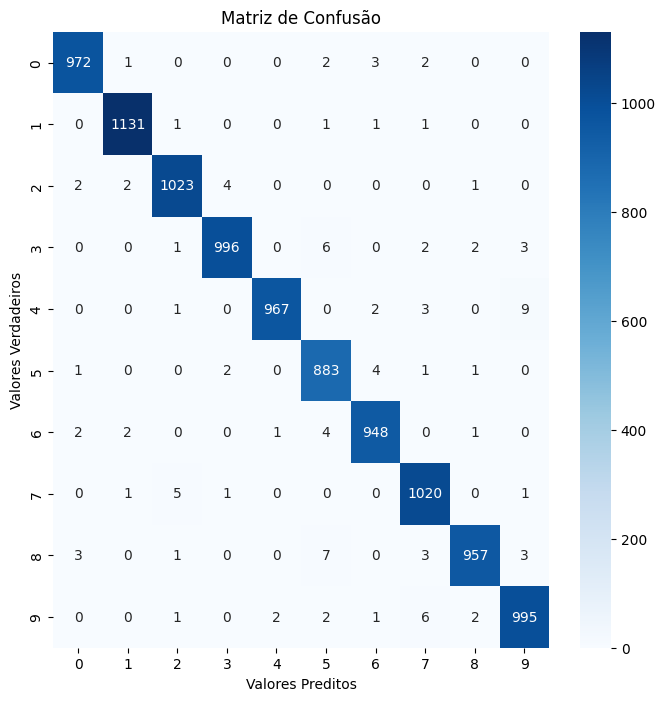

In [17]:
# Função para plotar matriz de confusão
def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 8))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
    plt.title("Matriz de Confusão")
    plt.xlabel("Valores Preditos")
    plt.ylabel("Valores Verdadeiros")
    plt.show()

# Função para avaliar o modelo
def evaluate_model(model, test_images, test_labels, class_names):
    # Avaliando o modelo no conjunto de teste
    test_loss, test_acc = model.evaluate(test_images, test_labels)
    print(f'Accuracy: {test_acc:.4f}')

    # Fazendo previsões no conjunto de teste
    predictions = model.predict(test_images)
    predicted_classes = np.argmax(predictions, axis=1)
    true_classes = np.argmax(test_labels, axis=1)

    # Relatório de classificação
    print("\nRelatório de Classificação:")
    print(classification_report(true_classes, predicted_classes, target_names=class_names))

    # Matriz de Confusão
    plot_confusion_matrix(true_classes, predicted_classes, class_names)

# Class names para o conjunto de dados MNIST
class_names = [str(i) for i in range(10)]

# Chame a função de avaliação
evaluate_model(lenet_model, test_images, test_labels, class_names)
